<a href="https://colab.research.google.com/github/mfigueroa26/DataScience-Project/blob/main/NBAPlayerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, norm

input_file = 'movies_metadata (2).csv'

Profits = []
Budgets = []
Revenues = []
with open(input_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        try:
            Revenue = float(row.get('revenue', 0))
            Budget = float(row.get('budget', 0))
            Profit = Revenue - Budget
            Profits.append(Profit)
            Budgets.append(Budget)
            Revenues.append(Revenue)
        except ValueError:
            continue

if Profits:
    mean_profits = statistics.mean (Profits)
    standard_deviation_profits = statistics.stdev (Profits)

density = gaussian_kde(Profits)
x = np.linspace(min(Profits), max(Profits), len(Profits))

normal_curve = norm.pdf(x, mean_profits, standard_deviation_profits)

plt.hist(Profits, bins=50, edgecolor='black', density=True)
plt.plot(x, density(x), 'r', linewidth=2)
plt.plot(x, normal_curve, color='green', label="Normal Distribution")
plt.title("Density Plot of Movie Profit with Normal Curve")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.show()

plt.scatter(Profits, Budgets)
m, b = np.polyfit(Profits, Budgets, 1)
plt.plot(x, m*x + b)
plt.show()

plt.scatter(Revenues, Budgets)
m, b = np.polyfit(Revenues, Budgets, 1)
plt.plot(x, m*x + b)
plt.show()

plt.scatter(Profits,Revenues)
m, b = np.polyfit(Profits, Revenues, 1)
plt.plot(x, m*x + b)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'movies_metadata (2).csv'

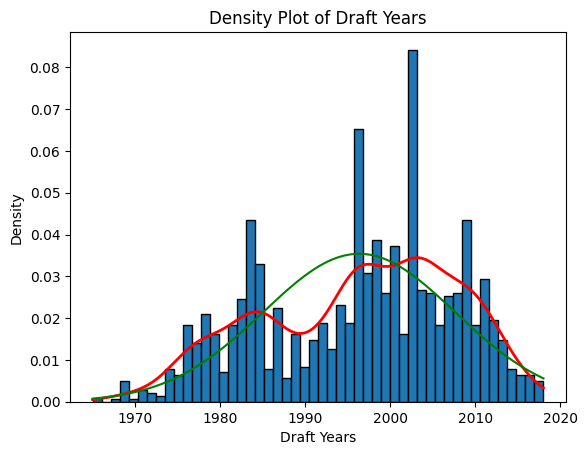

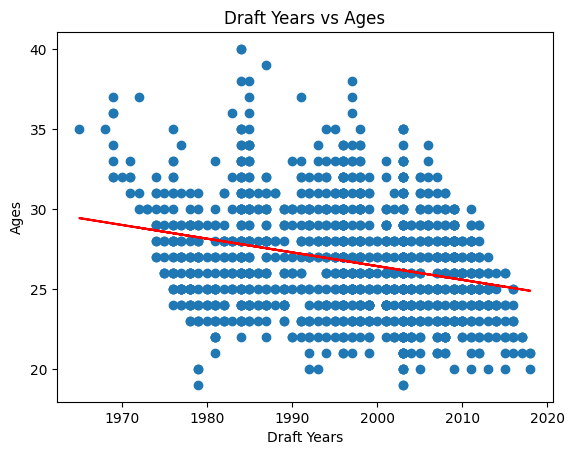

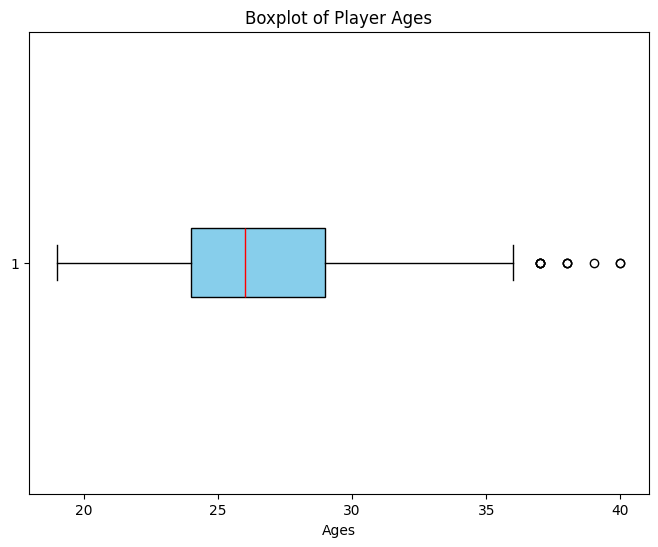

In [ ]:
import csv
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, norm

input_file = 'NBA_player_of_the_week.csv'

DraftYears = []
Ages = []
seasonsInLeague = []
with open(input_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        try:
            draftyear = float(row.get('Draft Year', 0))
            Age = float(row.get('Age', 0))
            Seasons = float(row.get('Seasons in League',0))
            DraftYears.append(draftyear)
            Ages.append(Age)
            seasonsInLeague.append(Seasons)
        except ValueError:
            continue

mean_DraftYears = statistics.mean (DraftYears)
standard_deviation_DraftYears = statistics.stdev (DraftYears)

density = gaussian_kde(DraftYears)
x = np.linspace(min(DraftYears), max(DraftYears), len(DraftYears))

normal_curve = norm.pdf(x, mean_DraftYears, standard_deviation_DraftYears)

plt.hist(DraftYears, bins=50, edgecolor='black', density=True)
plt.plot(x, density(x), 'r', linewidth=2)
plt.plot(x, normal_curve, color='green', label="Normal Distribution")
plt.title("Density Plot of Draft Years")
plt.xlabel("Draft Years")
plt.ylabel("Density")
plt.show()

def filter_valid_and_non_constant(x, y):
    x = np.array(x)
    y = np.array(y)
    valid_indices = ~np.isnan(x) & ~np.isnan(y) & (np.ptp(x) > 0) & (np.ptp(y) > 0)
    return x[valid_indices], y[valid_indices]

valid_DraftYears, valid_Ages = filter_valid_and_non_constant(DraftYears, Ages)
if len(valid_DraftYears) > 1 and len(valid_Ages) > 1:
    plt.scatter(valid_DraftYears, valid_Ages)
    m, b = np.polyfit(valid_DraftYears, valid_Ages, 1)
    plt.plot(valid_DraftYears, m * valid_DraftYears + b, color='red')
    plt.title("Draft Years vs Ages")
    plt.xlabel("Draft Years")
    plt.ylabel("Ages")
    plt.show()

valid_Ages, valid_seasonsInLeague = filter_valid_and_non_constant(Ages, seasonsInLeague)
if len(valid_Ages) > 1 and len(valid_seasonsInLeague) > 1:
    plt.scatter(valid_Ages, valid_seasonsInLeague)
    m, b = np.polyfit(valid_Ages, valid_seasonsInLeague, 1)
    plt.plot(valid_Ages, m * valid_Ages + b, color='red')
    plt.title("Ages vs Seasons in League")
    plt.xlabel("Ages")
    plt.ylabel("Seasons in League")
    plt.show()

valid_seasonsInLeague, valid_DraftYears = filter_valid_and_non_constant(seasonsInLeague, DraftYears)
if len(valid_seasonsInLeague) > 1 and len(valid_DraftYears) > 1:
    plt.scatter(valid_seasonsInLeague, valid_DraftYears)
    m, b = np.polyfit(valid_seasonsInLeague, valid_DraftYears, 1)
    plt.plot(valid_seasonsInLeague, m * valid_seasonsInLeague + b, color='red')
    plt.title("Seasons in League vs Draft Years")
    plt.xlabel("Seasons in League")
    plt.ylabel("Draft Years")
    plt.show()


plt.figure(figsize=(8,6))
plt.boxplot(Ages, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.title("Boxplot of Player Ages")
plt.xlabel("Ages")
plt.show()
